### Principal Component Analysis applied to images

This notebook is based on Shankar Muthuswamy's example at https://shankarmsy.github.io/posts/pca-sklearn.html

In [1]:
#Before using PCA, let us try and understand as well as display the original images.
#Note the Olivetti faces data is available in scikit-learn but not locally. It needs to be downloaded.
from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()
#print oliv.keys()
print oliv.data.shape 
#tells us there are 400 images that are 64 x 64 (4096) pixels each

(400L, 4096L)


In [2]:
oliv

{'DESCR': 'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n',
 'data': array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
          0.16115703,  0.1570248 ],
        [ 0.45454547,  0.47107437,  0.51239669, ...,  0.15289256,
          

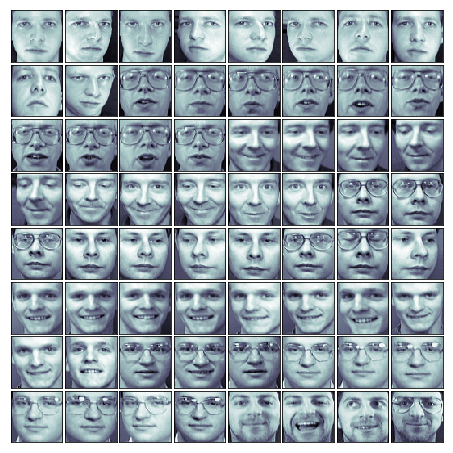

In [3]:
#Setup a figure 6 inches by 6 inches
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')
plt.show()

In [4]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.
from sklearn.decomposition import PCA
import numpy as np
X,y=oliv.data, oliv.target
pca_oliv = PCA(n_components=64)
X_proj = pca_oliv.fit_transform(X)
print X_proj.shape 

(400L, 64L)


In [5]:
print np.cumsum(pca_oliv.explained_variance_ratio_.sum())
#That's terrific, compressing a 64x64 pixel image down to an 8x8 image
#still retains about 89.7% of the variance

[ 0.89695573]


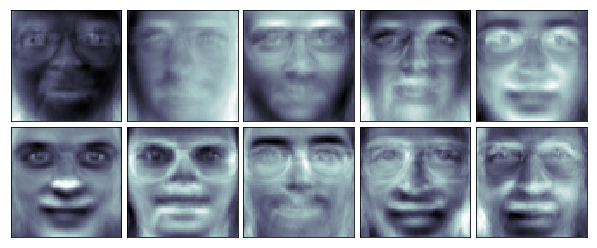

In [6]:
# This is great so far. Now we have a reduced 64x64 dimension(4096 feature)dataset, generated with 64 principal components.
# Each of these principal components can explain some variation in the original dataset.
# The parameter components_ of the #estimator object gives the components with maximum variance

# Below we'll try to visualize the top 8 principal components. 
# This is NOT a reconstruction of the original data, just 
# visualizing the principal components as images.
# The principal components are vectors of the length = to the number of # features 4096.
# We'll need to reshape it to a 64 x 64 matrix.

# Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

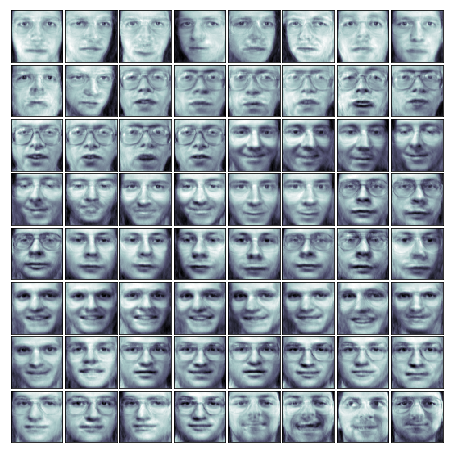

In [7]:
# Awesome, let's now try to reconstruct the images using the new reduced dataset.
# In other words, we transformed the
# 64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform
# the 8x8 images back to 64x64 dimension.
# Note that we're not reverting back to the original data, we're simply going back to the
# actual dimension of the original images so we can visualize them.

X_inv_proj = pca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

# This is not bad at all, the image still looks pretty good but the finer details are missing,
# which is okay considering we've reduced dimensionality (and image file size) by 64 times.

### Randomized PCA algorithm
Let's try an alternative dimensionality reduction scikit learn PCA function.  The Randomized PCA function is a variant of PCA that often is good to break down/compress original data/images.


In [8]:
from sklearn.decomposition import RandomizedPCA
rpca_oliv = PCA(64,svd_solver='randomized').fit(X)
print "Randomized PCA with 64 components: ", np.sum(rpca_oliv.explained_variance_ratio_)
print "PCA with 64 components: ", np.sum(pca_oliv.explained_variance_ratio_)

#The cumulative explained variance doesn't tell us much. It actually is slightly less than PCA.

Randomized PCA with 64 components:  0.897081
PCA with 64 components:  0.896956


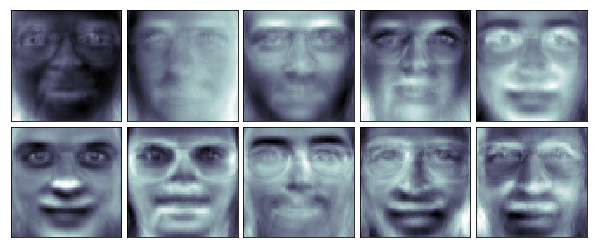

In [9]:
# Let's try and plot the principal components to see if the images look any better.

# Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(rpca_oliv.components_[i,:], (64,64)),cmap=plt.cm.bone, interpolation='nearest')

# Interesting! Some of the images actually look a bit better than those rendered with PCA.

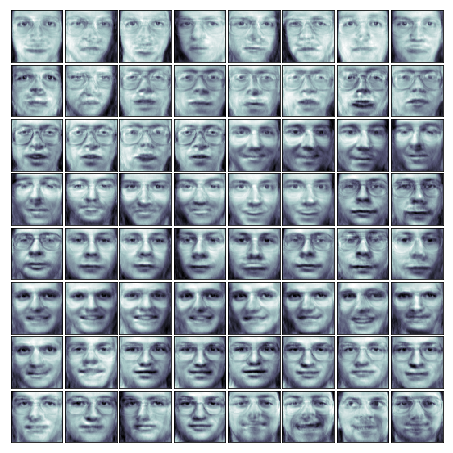

In [10]:
# Let's now try to reconstruct the images back into 64x64 inges from using the new reduced dataset.
# Note that we're not reverting back to the original data, we're simply going back to the
# actual dimension of the original images so we can visualize them.

X_inv_proj = rpca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

# This is not bad at all, the image still looks pretty good but the finer details are missing,
# which is okay considering we've reduced dimensionality (and image file size) by 64 times.

Different.  But are they better images in this case than straight PCA.  You be the judge.

(425L, 283L, 3L)


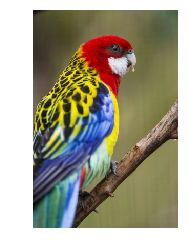

In [11]:
#Okay, let's import this image called "colorful_bird.png", stored in the same working directory as this notebook. import matplotlib.image as mpimg
import matplotlib.image as mpimg
img = mpimg.imread('images/colorful_bird_.png')

#Now, let's look at the size of this numpy array object img as well as plot it using imshow.
print img.shape
plt.axis('off')
plt.imshow(img)

From the shape above we see that the array is a 3 dimentional array with 425 rows, 283 columns and three values deep

In [ ]:
# Let's reshape it into a format that PCA can understand.
# 849 = 283 * 3
img_r = np.reshape(img, (425, 849))
print img_r.shape

In [ ]:
# Now lets run RandomizedPCA with 64 components and transform the image
ipca = PCA(64, svd_solver='randomized').fit(img_r)
img_c = ipca.transform(img_r)
print img_c.shape
print np.sum(ipca.explained_variance_ratio_)
#Great, looks like with 64 components we can explain about 98% of the variance

In [ ]:
# To visualize how PCA has performed this compression, let's inverse transform the PCA output and 
# reshape for visualization using imshow.
temp = ipca.inverse_transform(img_c)
print temp.shape

# reshaping 849 back to the original 253 * 3
temp = np.reshape(temp, (425,283,3))

print temp.shape

In [ ]:
#Now lets visualize like before with imshow and see how our image looks reduced to just 64 components then inversed back to a 768 pixel x 1024 pixel image
plt.axis('off')
plt.imshow(temp)

Parts of that image look pretty good considering the drastic reduction in dimensions we did.  Some areas do not look good at all.  We would need to explore some of the other dimensionality reduction methods in scikit learn to see if we can do better with this level of dimensionality reduction of color images.

In [ ]:
# Now lets run regular PCA with 64 components (8x8 pixels) and transform the image to see if that works better
ipca = PCA(64).fit(img_r)
img_c = ipca.transform(img_r)
print img_c.shape
print np.sum(ipca.explained_variance_ratio_)
# Great, looks like with 64 components we can explain about 99% of the variance

In [ ]:
# Lets inverse back to a 425x283 image and see how that looks
# To visualize how PCA has performed this compression, let's inverse transform the PCA output and 
# reshape for visualization using imshow.
temp = ipca.inverse_transform(img_c)
print temp.shape

# reshaping 849 back to the original 253 * 3
temp = np.reshape(temp, (425,283,3))

print temp.shape

plt.axis('off')
plt.imshow(temp)

Not much better so we would have to try other dimensionality reduction techniques on color images to see if we can do better.  But for certain purposes such as image recognition the reduction results we have might be good enough.  Try some other images and note that the areas that are poorly colored are usually in areas where the colors are slowly changing from pixel to pixel.